## PCA challenge ;)

Load the dataset and type your code, later try to answer:


4. How many principal components can we consider? 

5. Consider the necessary number of components to explain at least a 95% of the variance.

6. Calculate the new values for this decomposition and plot them. 


7. Consider the necessary number of components to explain at least a 85% of the variance.

8. Calculate the new values for this decomposition and plot them. 

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [115]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/dataset.csv.zip',index_col=0, header=None).T
dataset = dataset.rename(columns={np.nan: 'id'})
dataset = dataset.set_index('id')
dataset

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00015,Feature00016,Feature00017,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Observation1,2,4,0,0,19,7,0,4,7,86,22,276,298,30,0,89,0,26,30,227,185,93,0,915,738,0,1,803,0,3398,38,351,15,303,41,228,70,39,85,146,...,0,0,0,28,14,0,0,0,0,0,1,14,0,0,68,0,0,1,0,0,20,0,181,0,9,0,2,483,5,0,0,0,0,0,0,0,4,134,0,0
Observation2,4,1,1,0,10,5,0,1,5,53,21,224,282,34,0,53,0,25,22,212,158,81,0,683,575,0,2,617,0,2740,30,352,18,279,36,234,52,40,68,130,...,0,0,0,29,11,0,0,0,0,0,1,8,0,0,49,0,0,0,0,0,9,0,157,3,12,0,2,336,1,0,0,0,0,0,0,0,4,118,0,0
Observation3,18,3,4,0,19,1,2,12,2,86,58,209,327,57,0,66,0,60,26,229,265,53,0,1140,480,0,4,283,0,2078,31,373,142,185,71,334,45,69,151,169,...,1,0,1,40,8,0,0,0,0,0,5,11,0,0,81,0,0,0,0,0,25,0,336,1,9,0,0,296,5,0,0,4,0,0,0,0,3,98,0,0
Observation4,24,1,2,0,13,0,1,18,1,78,49,280,297,63,0,52,0,88,28,258,354,75,0,1210,490,0,6,344,0,1776,34,291,133,219,81,312,62,44,176,191,...,1,0,0,24,8,0,0,0,0,0,5,9,0,0,75,0,0,0,0,0,41,0,374,0,20,0,0,289,6,0,0,2,0,0,0,0,1,80,0,0
Observation5,7,5,0,0,50,31,0,21,30,257,85,903,1228,129,0,191,0,88,132,748,524,346,1,3030,2398,0,9,3170,0,13572,139,1070,55,1073,150,677,236,125,305,330,...,0,0,0,55,34,0,0,0,0,0,10,46,0,0,249,0,0,1,0,0,93,0,527,4,18,0,15,1614,6,0,0,2,0,0,0,2,11,372,0,0
Observation6,4,4,5,0,57,26,0,19,32,254,89,978,1258,105,0,240,0,33,96,716,577,351,0,3192,2334,0,3,3118,0,13588,146,1228,50,1083,116,723,206,138,233,322,...,0,0,1,66,37,0,0,0,0,0,12,53,0,0,201,0,0,0,0,0,57,0,513,6,17,0,11,1726,6,0,0,3,0,0,0,0,20,461,0,0
Observation7,93,9,2,0,45,12,0,127,75,434,262,1061,1853,274,0,265,0,260,143,1201,1007,259,1,5614,2398,1,15,2368,1,11954,196,1856,629,1018,441,1478,320,204,701,665,...,6,0,2,81,27,1,0,0,0,0,33,54,0,0,342,0,0,1,0,0,177,0,1232,4,51,0,3,1864,17,0,0,6,0,0,0,3,20,417,0,0
Observation8,77,4,6,0,58,9,0,98,42,454,247,1056,1928,226,0,194,0,214,149,1136,918,303,0,5271,2552,0,7,2578,0,13926,188,1528,776,1027,311,1145,338,196,710,463,...,1,0,3,79,45,0,0,0,0,0,27,80,0,0,339,0,0,1,0,0,121,0,1152,5,38,0,6,1971,36,0,0,7,0,0,0,1,15,525,0,0


# Principal Component Analysis

Normalizing

In [116]:
counts = dataset.values
counts_std = StandardScaler().fit_transform(counts)
counts_std.shape

(8, 24690)

Visualizing as dataframe

In [117]:
sample_cols = ['Feature'+str(i) for i in range(1, counts_std.shape[1]+1)]
counts_norm = pd.DataFrame(counts_std,columns=sample_cols)
counts_norm.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
0,-0.793457,0.052778,-1.178511,0.0,-0.774772,-0.412050,-0.538816,-0.754526,-0.712629,-0.829874,-0.912832,-0.915250,-0.944264,-0.997477,0.0,-0.663822,0.0,-0.874962,-0.896957,-0.928949,-1.037115,-0.830872,-0.577350,-0.929000,-0.815093,-0.377964,-1.145573,-0.724398,-0.377964,-0.825786,-0.897829,-0.913827,-0.757189,-0.855459,-0.846407,-0.954231,-0.829354,-1.054564,-0.901081,-0.895451,...,-0.592157,0.0,-0.830747,-1.023124,-0.659027,-0.377964,0.0,0.0,0.0,0.0,-0.956974,-0.795368,0.0,0.0,-0.929109,0.0,0.0,1.0,0.0,0.0,-0.877760,0.0,-0.977557,-1.339112,-0.907393,0.0,-0.562652,-0.807588,-0.494015,0.0,0.0,-1.251086,0.0,0.0,0.0,-0.688247,-0.786583,-0.816737,0.0,0.0
1,-0.733855,-1.213894,-0.707107,0.0,-1.243541,-0.600416,-0.538816,-0.822095,-0.795253,-1.045936,-0.923947,-1.052257,-0.968024,-0.950399,0.0,-1.100308,0.0,-0.886907,-1.045675,-0.967243,-1.126436,-0.928502,-0.577350,-1.054535,-0.990457,-0.377964,-0.910584,-0.881596,-0.377964,-0.947047,-1.013213,-0.912103,-0.746487,-0.914905,-0.883248,-0.940381,-0.984656,-1.039027,-0.971148,-0.987292,...,-0.592157,0.0,-0.830747,-0.977141,-0.878702,-0.377964,0.0,0.0,0.0,0.0,-0.956974,-1.029587,0.0,0.0,-1.093324,0.0,0.0,-1.0,0.0,0.0,-1.079438,0.0,-1.039624,0.058222,-0.693889,0.0,-0.562652,-1.009014,-0.870408,0.0,0.0,-1.251086,0.0,0.0,0.0,-0.688247,-0.786583,-0.909008,0.0,0.0
2,-0.316638,-0.369446,0.707107,0.0,-0.774772,-0.977147,2.334869,-0.574340,-0.919188,-0.829874,-0.512686,-1.091779,-0.901200,-0.679697,0.0,-0.942688,0.0,-0.468836,-0.971316,-0.923843,-0.772460,-1.156306,-0.577350,-0.807252,-1.092664,-0.377964,-0.440605,-1.163876,-0.377964,-1.069044,-0.998790,-0.875904,-0.304124,-1.147734,-0.625365,-0.709542,-1.045051,-0.588458,-0.629057,-0.763429,...,-0.065795,0.0,0.118678,-0.471327,-1.098378,-0.377964,0.0,0.0,0.0,0.0,-0.600891,-0.912477,0.0,0.0,-0.816752,0.0,0.0,-1.0,0.0,0.0,-0.786088,0.0,-0.576707,-0.873334,-0.907393,0.0,-0.954062,-1.063824,-0.494015,0.0,0.0,0.417029,0.0,0.0,0.0,-0.688247,-0.923381,-1.024346,0.0,0.0
3,-0.137831,-1.213894,-0.235702,0.0,-1.087285,-1.071330,0.898027,-0.439201,-0.960500,-0.882253,-0.612723,-0.904711,-0.945749,-0.609079,0.0,-1.112433,0.0,-0.134380,-0.934136,-0.849808,-0.478032,-0.977317,-0.577350,-0.769375,-1.081905,-0.377964,0.029374,-1.112322,-0.377964,-1.124698,-0.955521,-1.017255,-0.336231,-1.063519,-0.551684,-0.760327,-0.898377,-0.976880,-0.526017,-0.637148,...,-0.065795,0.0,-0.830747,-1.207056,-1.098378,-0.377964,0.0,0.0,0.0,0.0,-0.600891,-0.990550,0.0,0.0,-0.868609,0.0,0.0,-1.0,0.0,0.0,-0.492737,0.0,-0.478434,-1.339112,-0.124544,0.0,-0.954062,-1.073415,-0.399917,0.0,0.0,-0.417029,0.0,0.0,0.0,-0.688247,-1.196975,-1.128150,0.0,0.0
4,-0.644451,0.475002,-1.178511,0.0,0.839879,1.848338,-0.538816,-0.371632,0.237543,0.289719,-0.212577,0.736745,0.436771,0.167717,0.0,0.572888,0.0,-0.134380,0.999201,0.401130,0.084359,1.227494,1.732051,0.215425,0.970823,-0.377964,0.734342,1.276070,-0.377964,1.049141,0.558890,0.325582,-0.614491,1.051754,-0.043287,0.082236,0.602872,0.281605,0.005667,0.160722,...,-0.592157,0.0,-0.830747,0.218420,0.805477,-0.377964,0.0,0.0,0.0,0.0,-0.155787,0.

PCA

In [118]:
components = 4
pca_counts = PCA(n_components=components)
principalComponents_counts = pca_counts.fit_transform(counts_std)
principalComponents_counts.shape

(8, 4)

New data frame where Features have been replaced by principal components

In [119]:
cols = ['PC'+str(i) for i in range(1,(components+1))]
principal_counts_df = pd.DataFrame(data = principalComponents_counts, columns = cols)
principal_counts_df.tail()

,PC1,PC2,PC3,PC4
3,-105.873653,-32.613236,2.422218,-1.365150
4,56.854967,72.057560,-7.824240,54.950702
5,57.112703,89.378410,-9.640106,-47.498728
6,171.292590,-66.149327,-56.037075,-2.300798
7,156.155044,-30.872888,70.114349,-2.177433


Proportion of variation explained:

In [120]:
print('Explained variation per principal component: {}'.format(pca_counts.explained_variance_ratio_))

Explained variation per principal component: [0.73135743 0.13774563 0.05513513 0.0354783 ]


Checking the proportion of variance explained

In [121]:
sum(pca_counts.explained_variance_ratio_)

0.959716492774848

# Questions:

4. How many principal components can we consider?



In [0]:
#The number of principal components can range from 1 to the maximum number of samples or features. 

5. Consider the necessary number of components to explain at least a 95% of the variance.
6. Calculate the new values for this decomposition and plot them.

In [0]:
#The minimum number of PC necessary in order to explain a cummulative sum of variance of 95% is 4 PC. 

In [136]:
components = 4
pca_counts = PCA(n_components=components)
principalComponents_counts = pca_counts.fit_transform(counts_std)
cols = ['PC'+str(i) for i in range(1,(components+1))]
principal_counts_df = pd.DataFrame(data = principalComponents_counts, columns = cols)
sum(pca_counts.explained_variance_ratio_)

0.9597164927748479

Text(0.5, 0.98, 'Principal Component Analysis - 95%')

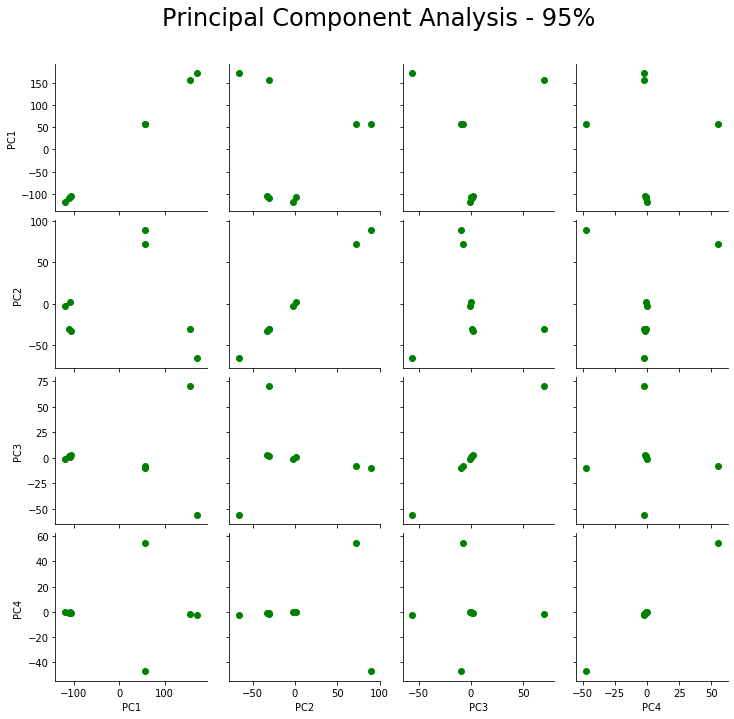

In [137]:
  pca_plot = sns.PairGrid(principal_counts_df)
  pca_plot.map(plt.scatter, color = 'g')
  plt.subplots_adjust(top=0.90)
  pca_plot.fig.suptitle("Principal Component Analysis - 95%", fontsize=24)


7. Consider the necessary number of components to explain at least a 85% of the variance.
8. Calculate the new values for this decomposition and plot them.

In [0]:
#The minimum number of PC necessary in order to explain a cummulative sum of variance of 85% is 2 PC. 

In [124]:
components = 2
pca_counts = PCA(n_components=components)
principalComponents_counts = pca_counts.fit_transform(counts_std)
cols = ['PC'+str(i) for i in range(1,(components+1))]
principal_counts_df = pd.DataFrame(data = principalComponents_counts, columns = cols)
sum(pca_counts.explained_variance_ratio_)

0.869103058454199

Get indexes to get sample labels

In [125]:
indexNamesArr = principal_counts_df.index.values
listOfRowIndexLabels = list(indexNamesArr)
listOfRowIndexLabels

[0, 1, 2, 3, 4, 5, 6, 7]

<Figure size 432x288 with 0 Axes>

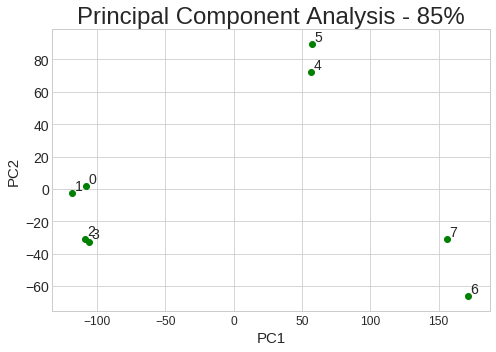

In [133]:
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.figure(figsize=(7,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('PC1',fontsize=15)
  plt.ylabel('PC2',fontsize=15)
  plt.title("Principal Component Analysis - 85%",fontsize=24)
  for i,element in enumerate(listOfRowIndexLabels): 
    x = principal_counts_df.iloc[i,0]
    y = principal_counts_df.iloc[i,1]
    plt.scatter(x, y, color='g')
    plt.text(x+2, y+2, element, fontsize=14)
  plt.tight_layout()
  plt.show()


In [0]:
#Here we can clearly see the 3 groups and their labels in case we want to trace a phenotype correlation with those samples.